In [2]:
import sys
sys.path.append('..')

In [3]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from DomainPrediction.utils import helper

### T domain Dataset

In [5]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/fitness_prediction/Tdomain'

In [6]:
df = pd.read_csv(os.path.join(data_path, 'dataset_2_tdomain.csv'))

In [7]:
df.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,1.730126,0,45,0.548194
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.073117,2,46,-2.615701
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059


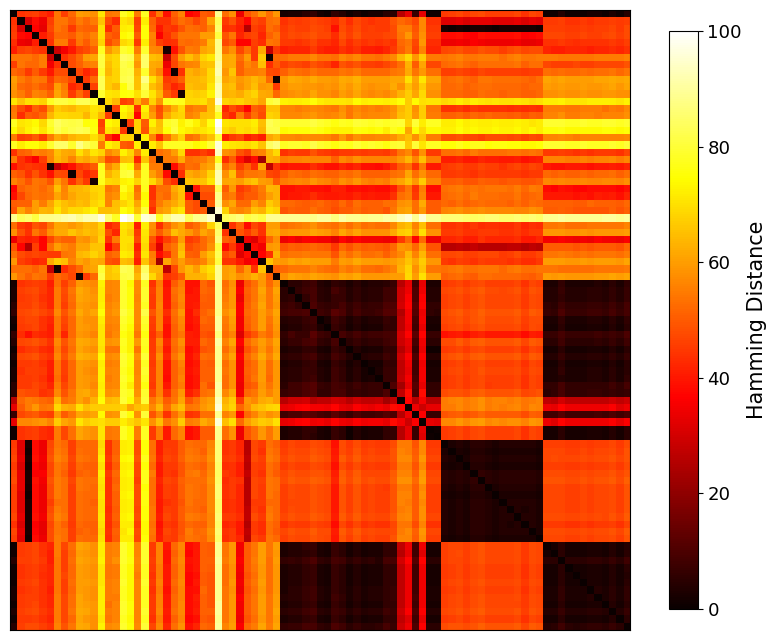

In [8]:
dist_matrix = np.eye(df['seq'].shape[0])
sequences = df['seq'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = helper.hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
colorbar = plt.colorbar(shrink=0.75)
colorbar.ax.tick_params(labelsize=13)
colorbar.set_label('Hamming Distance', size=15)
plt.xticks([])
plt.yticks([])
plt.show()

/tmp/ipykernel_2568086/3981828786.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['name'] = pd.Categorical(_df['name'], categories=ai_gen, ordered=True)


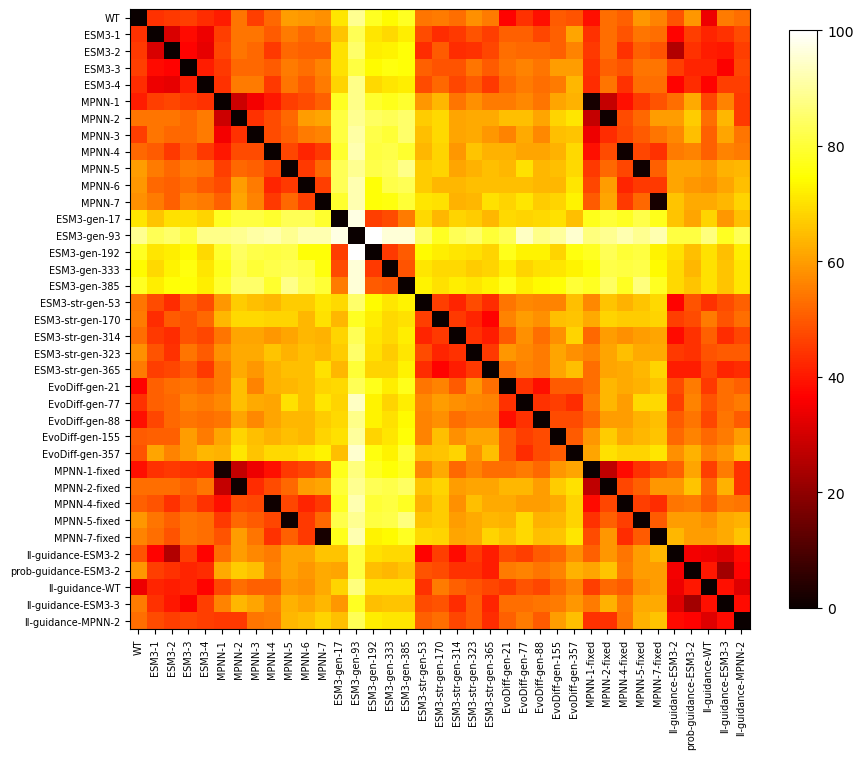

In [9]:
ai_gen = ['WT', 'ESM1', 'ESM2', 'ESM3', 'ESM4', 'IN1', 'IN2', 'IN3', 'IN4', 'IN5', 'IN6', 'IN7', 
          'esm3_gen_17', 'esm3_gen_93', 'esm3_gen_192', 'esm3_gen_333', 'esm3_gen_385', 
          'esm3_str_gen_53', 'esm3_str_gen_170', 'esm3_str_gen_314', 'esm3_str_gen_323', 'esm3_str_gen_365', 
          'evodiff_gen_21', 'evodiff_gen_77', 'evodiff_gen_88', 'evodiff_gen_155', 'evodiff_gen_357', 
          'Test-IN1-improved', 'Test-IN2-improved', 'Test-IN4-improved', 'Test-IN5-improved', 'Test-IN7-improved', 
          'II guidance-ESM2', 'prob_guidancd-ESM2', 'II guidance-WT', 'II_guidance-ESM3', 'II guidance-IN2']

_label = ['WT', 'ESM3-1', 'ESM3-2', 'ESM3-3', 'ESM3-4', 'MPNN-1', 'MPNN-2', 'MPNN-3', 'MPNN-4', 'MPNN-5', 'MPNN-6', 'MPNN-7', 
          'ESM3-gen-17', 'ESM3-gen-93', 'ESM3-gen-192', 'ESM3-gen-333', 'ESM3-gen-385', 
          'ESM3-str-gen-53', 'ESM3-str-gen-170', 'ESM3-str-gen-314', 'ESM3-str-gen-323', 'ESM3-str-gen-365', 
          'EvoDiff-gen-21', 'EvoDiff-gen-77', 'EvoDiff-gen-88', 'EvoDiff-gen-155', 'EvoDiff-gen-357', 
          'MPNN-1-fixed', 'MPNN-2-fixed', 'MPNN-4-fixed', 'MPNN-5-fixed', 'MPNN-7-fixed', 
          'll-guidance-ESM3-2', 'prob-guidance-ESM3-2', 'll-guidance-WT', 'll-guidance-ESM3-3', 'll-guidance-MPNN-2']

mask = df['name'].isin(ai_gen)
_df = df[mask]
_df['name'] = pd.Categorical(_df['name'], categories=ai_gen, ordered=True)
_df = _df.sort_values('name')

dist_matrix = np.eye(_df['seq'].shape[0])
sequences = _df['seq'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = helper.hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.xticks(np.arange(len(ai_gen)), _label, size=7, rotation=90)
plt.yticks(np.arange(len(ai_gen)), _label, size=7)
plt.show()

Text(0, 0.5, 'Count')

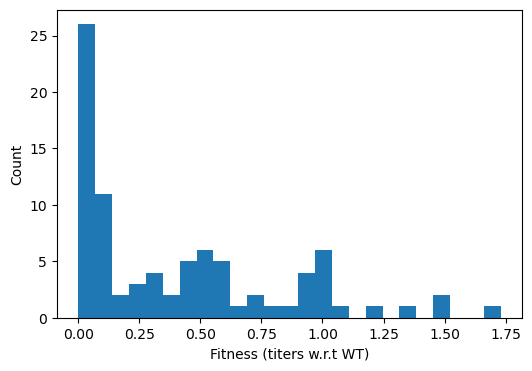

In [10]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

ax.hist(df['fitness_raw'], bins=25)
ax.set_xlabel('Fitness (titers w.r.t WT)')
ax.set_ylabel('Count')

In [11]:
df.shape

(85, 6)

In [12]:
df[df['fitness_raw']>=1]

,name,seq,fitness_raw,split_id,n_mut,fitness_log
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,1.730126,0,45,0.548194
26,evodiff_gen_155,EPDDAAFVRHVYQAPQGEVETQLAAIWEDLLGVERVGRHDNFFELG...,1.035816,0,50,0.035190
31,II guidance-WT,APGADAYAQQAYEAPQGEAEQRLAAIWAELLGVERVGRHDNFFELG...,1.058648,2,34,0.056993
48,GxpS_DESIGN-17,APGEDAFARQAYQAPQGEIEIALATIWRELLNVRQVGRHDSFFALG...,1.031657,2,1,0.031167
59,ESM2_EP_10_1_1,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,1.501961,0,45,0.406771
62,ESM2_EP_10_1_9,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,1.461114,0,45,0.379199
65,ESM2_EP_10_1_13,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,1.215484,0,46,0.195143
76,WT_EP_10_1_37,APGEDAFARQAYQAPHGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.007817,2,1,0.007787
82,WT_EP_10_1_49,ALGGDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFVLG...,1.315126,2,3,0.273932


In [13]:
df[df['fitness_raw']==0]

,name,seq,fitness_raw,split_id,n_mut,fitness_log
5,IN1,APGIEAYARPPYVAPQGERERLLASLWRELLRVPEVGANDSFFALG...,0.0,2,41,-13.815511
6,IN2,RPGIEAYAIPPFKAPKGERERLLAEYYKELLDVNEVSSNDSFFKLG...,0.0,2,54,-13.815511
8,IN4,APGPEAYPRAPFVAPEGERERLLAEILAELLDVPRVGAGDGFFALG...,0.0,2,52,-13.815511
9,IN5,QPAPAAHAVPPAVAPEGEVEFLLADIMKRLLNVSRVSANKRFFALG...,0.0,2,60,-13.815511
11,IN7,APPLAAYPTPPYRAPVGPREELLARIVKSVLKVDRVGADDGFLRLG...,0.0,2,58,-13.815511
12,esm3_gen_17,IPDASTLPTAEYVAPRTEVEQTLAGIWAELLGVEQVGIHDNFFDLG...,0.0,1,71,-13.815511
16,esm3_gen_333,QPDRAVLLEQAYVAPRTTLEEQLASIWSELLQRERVGIHDNFFELG...,0.0,1,74,-13.815511
45,GxpS_DESIGN-11,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,4,-13.815511
53,GxpS_DESIGN-22,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,26,-13.815511
54,GxpS_DESIGN-23,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,33,-13.815511


In [14]:
upper_triangle = np.triu(dist_matrix)
upper_triangle_indices = np.triu_indices(dist_matrix.shape[0], k=1)
upper_triangle_elements = dist_matrix[upper_triangle_indices]
mean_upper_triangle = np.mean(upper_triangle_elements)
mean_upper_triangle, min(upper_triangle_elements), max(upper_triangle_elements)

(58.792792792792795, 1.0, 100.0)

In [15]:
(df['split_id'].isin([0,1])).sum(), (df['split_id'] == 2).sum()

(30, 55)

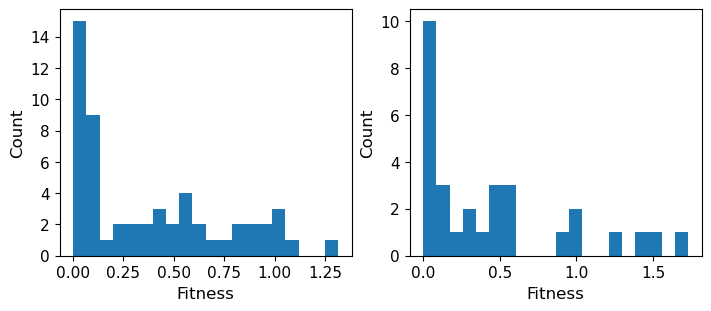

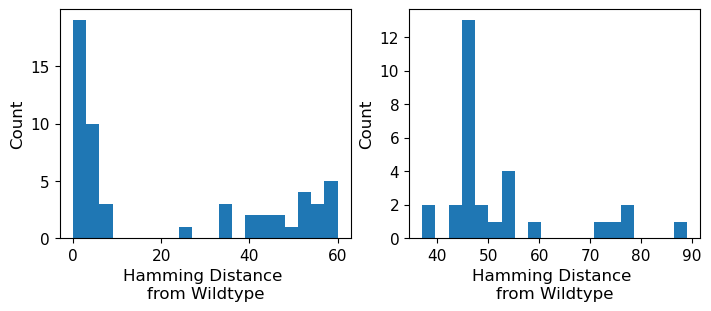

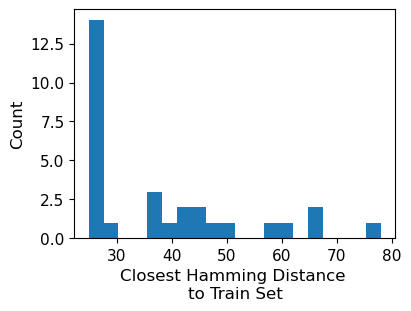

min distance: 25


In [26]:
fig, ax = plt.subplots(1,2, figsize=(7,3), layout='constrained')
ax[0].hist(df[df['split_id']==2]['fitness_raw'], bins=20)
ax[0].set_xlabel('Fitness', size=12)
ax[0].set_ylabel('Count', size=12)
ax[1].hist(df[df['split_id'].isin([0,1])]['fitness_raw'], bins=20)
ax[1].set_xlabel('Fitness', size=12)
ax[1].set_ylabel('Count', size=12)

ax[0].tick_params(axis='both', which='both', labelsize=11)
ax[1].tick_params(axis='both', which='both', labelsize=11)

fig, ax = plt.subplots(1,2, figsize=(7,3), layout='constrained')
ax[0].hist(df[df['split_id']==2]['n_mut'], bins=20)
ax[0].set_xlabel('Hamming Distance \nfrom Wildtype', size=12)
ax[0].set_ylabel('Count', size=12)
ax[1].hist(df[df['split_id'].isin([0,1])]['n_mut'], bins=20)
ax[1].set_xlabel('Hamming Distance \nfrom Wildtype', size=12)
ax[1].set_ylabel('Count', size=12)

ax[0].tick_params(axis='both', which='both', labelsize=11)
ax[1].tick_params(axis='both', which='both', labelsize=11)

fig, ax = plt.subplots(1,1, figsize=(4,3), layout='constrained')
closest_dist = []
for seq in df[df['split_id'].isin([0,1])]['seq']:
    temp = []
    for train_seq in df[df['split_id']==2]['seq']:
        temp.append(helper.hamming_distance(seq, train_seq))
    closest_dist.append(min(temp))
ax.hist(closest_dist, bins=20)
ax.set_xlabel('Closest Hamming Distance \nto Train Set', size=12)
ax.set_ylabel('Count', size=12)
ax.tick_params(axis='both', which='both', labelsize=11)

plt.show()

print(f'min distance: {min(closest_dist)}')

### beta lactamase

In [5]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/fitness_prediction/TEM1'

In [7]:
df = pd.read_csv(os.path.join(data_path, 'dataset_tem1.csv'))

In [8]:
df.head()

,pos,variant,fitness_raw,fitness_norm,wt_aa,n_mut,seq,fold_id,split_id
0,58,F58N,1.537240,1.142208,F,1,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,1,2
1,19,L19W,1.053720,1.094952,L,1,MSIQHFRVALIPFFAAFCWPVFAHPETLVKVKDAEDQLGARVGYIE...,0,2
2,15,A15Y,0.823567,1.072459,A,1,MSIQHFRVALIPFFYAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0,2
3,182,A182M,0.768011,1.067029,A,1,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,6,0
4,281,S281F,0.768011,1.067029,S,1,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,9,2


In [22]:
for i in df['fold_id'].unique():
    print(f"Fold {i}: {df[df['fold_id']==i]['pos'].unique().shape}")

Fold 1: (29,)
Fold 0: (29,)
Fold 6: (28,)
Fold 9: (28,)
Fold 5: (29,)
Fold 3: (29,)
Fold 4: (29,)
Fold 7: (28,)
Fold 2: (29,)
Fold 8: (28,)


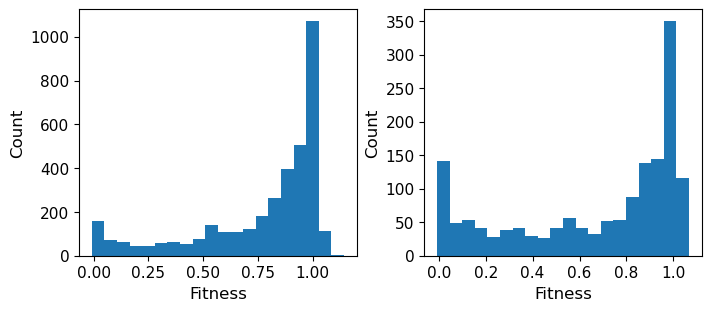

In [24]:
fig, ax = plt.subplots(1,2, figsize=(7,3), layout='constrained')
ax[0].hist(df[df['split_id']==2]['fitness_norm'], bins=20)
ax[0].set_xlabel('Fitness', size=12)
ax[0].set_ylabel('Count', size=12)
ax[1].hist(df[df['split_id'].isin([0,1])]['fitness_norm'], bins=20)
ax[1].set_xlabel('Fitness', size=12)
ax[1].set_ylabel('Count', size=12)

ax[0].tick_params(axis='both', which='both', labelsize=11)
ax[1].tick_params(axis='both', which='both', labelsize=11)

plt.show()

### GB1

In [25]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/fitness_prediction/GB1'

In [27]:
df = pd.read_csv(os.path.join(data_path, 'dataset_gb1.csv'))

In [28]:
df.head()

,seq,fitness_raw,split_id,n_mut,fitness_log
0,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,1.00,2,0,0.000000
1,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGIDGEWTYD...,1.45,2,1,0.371564
2,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGLDGEWTYD...,1.69,2,1,0.524729
3,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGMDGEWTYD...,1.17,2,1,0.157004
4,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVAGEWTYD...,2.40,2,1,0.875469


In [33]:
df[df['split_id']==0]['seq'].shape[0], df[df['split_id']==0]['seq'].unique().shape[0]

(5743, 5743)

In [35]:
for test_seq in df[df['split_id']==0]['seq']:
    if test_seq in df[df['split_id'].isin([1, 2])]['seq']:
        print('Found')

<Axes: >

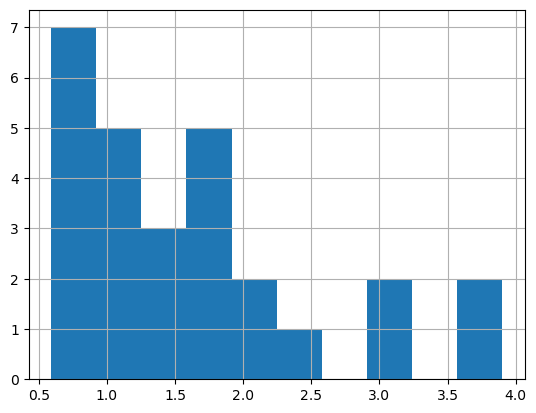

In [36]:
df[df['n_mut']==1]['fitness_raw'].hist()

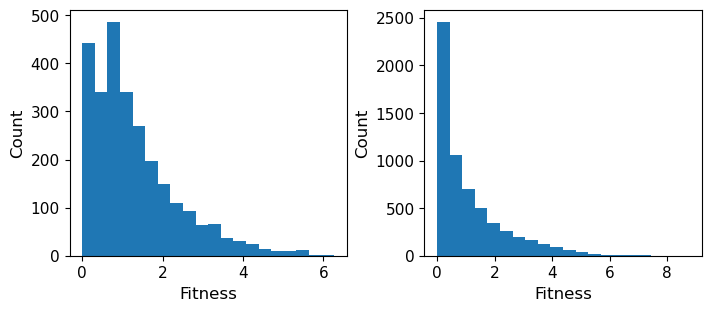

In [29]:
fig, ax = plt.subplots(1,2, figsize=(7,3), layout='constrained')
ax[0].hist(df[df['split_id']==2]['fitness_raw'], bins=20)
ax[0].set_xlabel('Fitness', size=12)
ax[0].set_ylabel('Count', size=12)
ax[1].hist(df[df['split_id'].isin([0,1])]['fitness_raw'], bins=20)
ax[1].set_xlabel('Fitness', size=12)
ax[1].set_ylabel('Count', size=12)

ax[0].tick_params(axis='both', which='both', labelsize=11)
ax[1].tick_params(axis='both', which='both', labelsize=11)

plt.show()

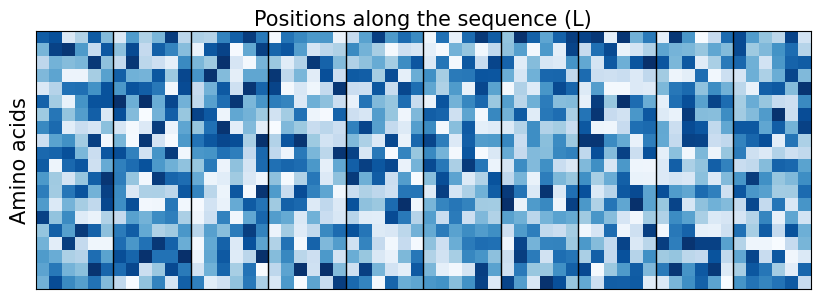

In [64]:
matrix = np.random.rand(20, 60)


# plt.figure(figsize=(10,10))
# plt.imshow(matrix, cmap='Blues')
# plt.xlabel('Positions along the sequence (L)', size=15)
# plt.ylabel('Amino acids', size=15)
# plt.xticks([])
# plt.yticks([])
# plt.gca().xaxis.set_label_position('top')

# # Add a dark line after every 10 cells


# plt.show()

plt.figure(figsize=(10,10))
plt.imshow(matrix, cmap='Blues')
plt.xlabel('Positions along the sequence (L)', size=15)
plt.ylabel('Amino acids', size=15)
plt.xticks([])
plt.yticks([])
plt.gca().xaxis.set_label_position('top')

for i in range(1, matrix.shape[1]):
    if i % 6 == 0:
        plt.axvline(i-0.5, color='black', linewidth=1)

plt.show()


In [68]:
df.groupby('split_id')['fitness_raw'].mean()

split_id
0    1.031736
1    1.201204
2    1.284181
Name: fitness_raw, dtype: float64